# Reading NASCAM ASI raw image data

Below we'll retrieve NASCAM ASI data (also known at NORSTAR NASCAM), read it, and do a bit of processing. An internet connection is required since we'll need to download data.

## Retrieve a minute of data

In [1]:
import requests

In [2]:
# 2015-01-15 07:30 UTC in Fort Smith, NWT, was a particularly good night
url = "https://data.phys.ucalgary.ca/sort_by_project/NORSTAR/nascam-msi/stream0.png/2008/02/01/gill_nascam-iccd02/ut06/20080201_0615_gill_nascam-iccd02.png.tar"
r = requests.get(url)

In [3]:
# save data to a local file
filename = "20080201_0615_gill_nascam-iccd02.png.tar"
with open(filename, 'wb') as f:
    f.write(r.content)

## Read the data file

In [4]:
import nascam_imager_readfile

In [5]:
img, meta, problematic_files = nascam_imager_readfile.read(filename)

In [6]:
# the imager takes a picture every 6 seconds, so a 1-minute file usually contains 10 images
print("Image dimensions: %d x %d" % (img.shape[0], img.shape[1]))
print("Number of images: %d" % (img.shape[2]))

Image dimensions: 256 x 256
Number of images: 12


In [7]:
# data for the first image
img[:,:,0]

array([[459, 471, 463, ..., 464, 457, 455],
       [446, 470, 452, ..., 458, 445, 451],
       [437, 462, 444, ..., 443, 437, 446],
       ...,
       [430, 424, 422, ..., 435, 440, 427],
       [428, 429, 419, ..., 437, 426, 432],
       [418, 428, 429, ..., 435, 431, 420]], dtype=uint16)

In [8]:
# metadata for first image
meta[0]

{'Project unique ID': 'nascam',
 'Site unique ID': 'gill',
 'Imager unique ID': 'nascam-iccd02',
 'Mode unique ID': '6300',
 'Image request start': datetime.datetime(2008, 2, 1, 6, 15, 2),
 'Subframe requested exposure': '2000.000 ms'}

## Visualize the image

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt

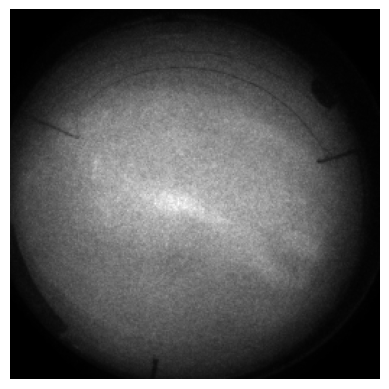

In [10]:
plt.imshow(img[:,:,0], cmap="gray")
plt.axis("off")
plt.show() 

# Let's scale the image so it's a bit brighter

In [11]:
# Pulled from SciPy. This function was depreated in 
# scipy v1.2.0, but it's quite useful for us.
import numpy as np
def bytescale(data, cmin=None, cmax=None, high=65535, low=0):
    if high > 65535:
        raise ValueError("`high` should be less than or equal to 65535.")
    if low < 0:
        raise ValueError("`low` should be greater than or equal to 0.")
    if high < low:
        raise ValueError("`high` should be greater than or equal to `low`.")

    if cmin is None:
        cmin = data.min()
    if cmax is None:
        cmax = data.max()

    cscale = cmax - cmin
    if cscale < 0:
        raise ValueError("`cmax` should be larger than `cmin`.")
    elif cscale == 0:
        cscale = 1

    scale = float(high - low) / cscale
    bytedata = (data - cmin) * scale + low
    return (bytedata.clip(low, high) + 0.5).astype(np.uint16)

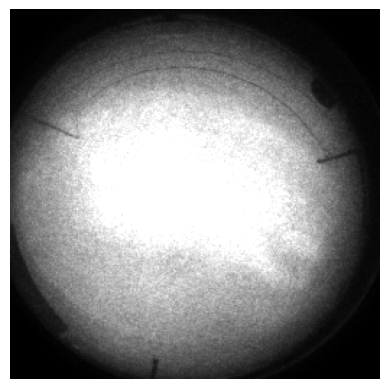

In [18]:
# scale the image with 1000 as the floor and 8000 as the ceiling, then display
im_scaled = bytescale(img[:,:,0], cmin=100, cmax=30000)
plt.imshow(im_scaled, cmap="gray")
plt.axis("off")
plt.show() 

## Cleanup downloaded file

In [19]:
# remove the downloaded files
import os
os.remove(filename)